# **(ADD THE NOTEBOOK NAME HERE)**

## Objectives

* Fetch data from Kaggle at : https://www.kaggle.com/datasets/abhishekrp1517/online-retail-transactions-dataset
* Save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\marka\\ILP\\ILP-independent-learning-project\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\marka\\ILP\\ILP-independent-learning-project'

# Section 1

Read the raw data

In [ ]:
# read the raw data
import pandas as pd

df = pd.read_csv('dataset/raw/Online Retail.csv')

In [8]:
# Display the first few rows of the dataframe
df.head()
# Display the shape of the dataframe
df.shape    
df.info(verbose=True, memory_usage='deep')
#note there are missing Description values
#count missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  int64  
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 175.2 MB


InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [9]:
# get the unique value count
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

---

# Section 2

Section 2 content
Do we have any duplicates?

In [10]:
#Do we have any duplicates?
df.duplicated().sum()

5268

In [13]:
# de-duplicate the dataframe
df = df.drop_duplicates()
# check the shape after de-duplication
df.shape

(536641, 8)

---

In [14]:
# Transform: Clean the data, handle missing values, encode categorical variables, and create new features such as total transaction value.
# Get to know the shape of the data

# find missing values
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

# Description has some missing values so we will use the StockCode for the product reference
# set Description to 'No Description' is missing

In [15]:
# set Description to 'No Description' is missing
df['Description'] = df['Description'].fillna('No Description')

In [16]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [19]:
df['Sales'] = df['Quantity'] * df['UnitPrice']
df['Sales'].sum()

9726006.953999998

In [ ]:
# we need to create 'Sales' = Quantity * UnitPrice and add this to the dataset
import numpy as np
df.loc[df['Sales'] < 0, 'Returns'] = np.abs(df['Sales'])
df.loc[df['Sales'] < 0, 'Sales']  = 0

print(f"total sales is {df['Sales'].sum()}")
print(f"total returns is {df['Returns'].sum()}")
# total profit is
print(f"total profit is {df['Sales'].sum() - df['Returns'].sum()}")



total sales is 10642110.804000001
total returns is 916103.8500000003
total profit is 9726006.954000002


NOTE

In [23]:
# encode categorical variables
df['Country'].value_counts()


Country
United Kingdom          490300
Germany                   9480
France                    8541
EIRE                      8184
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1994
Portugal                  1510
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Unspecified                442
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     294
USA                        291
Hong Kong                  284
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [25]:
import numpy as np 
# Over 90% of the sales are from the United Kingdom
# create 2 columns 'Is_UK' and 'Is_Not_UK'
df['Is_UK'] = np.where(df['Country'] == 'United Kingdom', 1, 0)
df['Is_Not_UK'] = np.where(df['Country'] != 'United Kingdom', 1, 0)



In [26]:
df.info(verbose=True, memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  536641 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   536641 non-null  int64  
 7   Country      536641 non-null  object 
 8   Sales        536641 non-null  float64
 9   Returns      9253 non-null    float64
 10  Is_UK        536641 non-null  int32  
 11  Is_Not_UK    536641 non-null  int32  
dtypes: float64(3), int32(2), int64(2), object(5)
memory usage: 206.0 MB


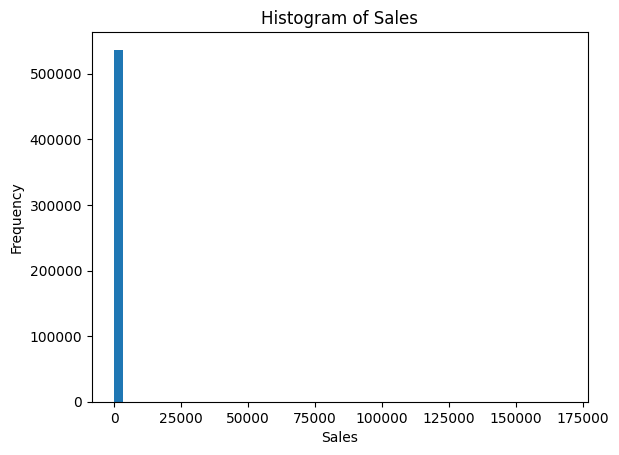

In [27]:
import matplotlib.pyplot as plt

# histogram of sales
plt.hist(df['Sales'], bins=50)
plt.title('Histogram of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

Number of outliers in Sales: 27505


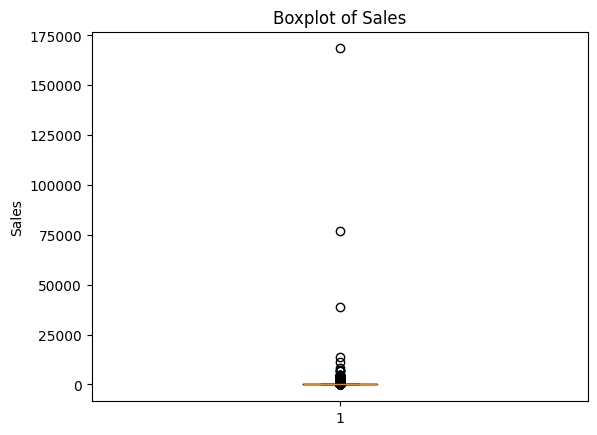

       InvoiceNo StockCode                     Description  Quantity  \
61619     541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   
222680    556444     22502  PICNIC BASKET WICKER 60 PIECES        60   
540421    581483     23843     PAPER CRAFT , LITTLE BIRDIE     80995   

                InvoiceDate  UnitPrice  CustomerID         Country     Sales  \
61619   2011-01-18 10:01:00       1.04       12346  United Kingdom   77183.6   
222680  2011-06-10 15:28:00     649.50       15098  United Kingdom   38970.0   
540421  2011-12-09 09:15:00       2.08       16446  United Kingdom  168469.6   

        Returns  Is_UK  Is_Not_UK  
61619       NaN      1          0  
222680      NaN      1          0  
540421      NaN      1          0  


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Returns,Is_UK,Is_Not_UK
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.6,NaN,1,0
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098,United Kingdom,38970.0,NaN,1,0
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.6,NaN,1,0


In [35]:
# find outliers in the sales data
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 3* IQR
upper_bound = Q3 + 3* IQR
outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]
print(f"Number of outliers in Sales: {len(outliers)}")
# plot a boxplot
plt.boxplot(df['Sales'])
plt.title('Boxplot of Sales')
plt.ylabel('Sales')
plt.show()
# what are these sales > 25000?
high_value_sales = df[df['Sales'] > 25000]
print(high_value_sales)
high_value_sales.head()

In [41]:
# suspect high value sales for PICNIC BASKET WICKER 60 PIECES because of the high unit price
# what are the unique unit prices of PICNIC BASKET WICKER 60 PIECES?
unit_prices = df.loc[df['StockCode'] == '22502', 'UnitPrice'].unique()
print(f"Unique unit prices of StockCode 22502 (PICNIC BASKET WICKER 60 PIECES): {unit_prices}")


Unique unit prices of StockCode 22502 (PICNIC BASKET WICKER 60 PIECES): [  5.95   4.95   8.47   0.     8.29  10.79   8.95 649.5    2.  ]


,UnitPrice,Count
0,5.95,216
1,10.79,98
2,8.29,96
3,4.95,32
4,8.47,29
5,0.00,6
6,649.50,2
7,8.95,1
8,2.00,1


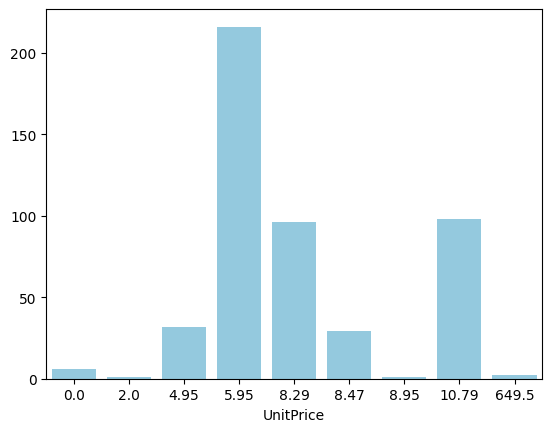

In [56]:
# plot a hbar the unique unit prices
import seaborn as sns
df_copy = df.copy()
df_copy = df_copy[df_copy['StockCode'] == '22502']

# use a seaborn chart to plot row count of unit price
sns.barplot(x=df_copy['UnitPrice'].value_counts().index, y=df_copy['UnitPrice'].value_counts().values, color='skyblue')


# show the same data as a table
df_copy['UnitPrice'].value_counts().to_frame(name='Count').reset_index()

In [61]:
# Show a UnitPrice price of zero?
# what are these rows?
df_copy[df_copy['UnitPrice'] == 0]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Returns,Is_UK,Is_Not_UK
14353,537534,22502,PICNIC BASKET WICKER SMALL,29,2010-12-07 11:48:00,0.0,15287,United Kingdom,0.0,NaN,1,0
42566,540012,22502,reverse 21/5/10 adjustment,-100,2011-01-04 11:14:00,0.0,15287,United Kingdom,-0.0,NaN,1,0
220285,556180,22502,No Description,40,2011-06-09 11:29:00,0.0,15287,United Kingdom,0.0,NaN,1,0
282819,561660,22502,No Description,1,2011-07-28 16:18:00,0.0,15287,United Kingdom,0.0,NaN,1,0
282883,561666,22502,No Description,30,2011-07-28 16:59:00,0.0,15287,United Kingdom,0.0,NaN,1,0
326549,565543,22502,No Description,8,2011-09-05 12:07:00,0.0,15287,United Kingdom,0.0,NaN,1,0


In [70]:

# Show a UnitPrice price of zero?
# what are these rows?
df_copy.info(verbose=True, memory_usage='deep')
#df_copy[df_copy['CustomerID'] == 15098 & df_copy['StockCode'] == '22502']
# query
df_copy[(df_copy['CustomerID'] == 15098) & (df_copy['StockCode'] == '22502')]

<class 'pandas.core.frame.DataFrame'>
Index: 481 entries, 249 to 359476
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    481 non-null    object 
 1   StockCode    481 non-null    object 
 2   Description  481 non-null    object 
 3   Quantity     481 non-null    int64  
 4   InvoiceDate  481 non-null    object 
 5   UnitPrice    481 non-null    float64
 6   CustomerID   481 non-null    int64  
 7   Country      481 non-null    object 
 8   Sales        481 non-null    float64
 9   Returns      9 non-null      float64
 10  Is_UK        481 non-null    int32  
 11  Is_Not_UK    481 non-null    int32  
dtypes: float64(3), int32(2), int64(2), object(5)
memory usage: 174.1 KB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Returns,Is_UK,Is_Not_UK
222670,556442,22502,PICNIC BASKET WICKER SMALL,60,2011-06-10 15:22:00,4.95,15098,United Kingdom,297.0,NaN,1,0
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098,United Kingdom,38970.0,NaN,1,0
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,649.50,15098,United Kingdom,649.5,NaN,1,0
222692,C556448,22502,PICNIC BASKET WICKER SMALL,-60,2011-06-10 15:39:00,4.95,15098,United Kingdom,0.0,297.0,1,0


* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

In [ ]:
# Sales over time
# plot sales over time
import pandas as pd
# seaborn
import seaborn as sns

seaborn.lineplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, units=None, weights=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, seed=None, orient='x', sort=True, err_style='band', err_kws=None, legend='auto', ci='deprecated', ax=None, **kwargs)




KeyError: 'InvoiceDate'

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  pass
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
